In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import QED
from rdkit.Chem import Descriptors

In [ ]:
df = pd.read_csv('BindingDB_All.tsv', sep='\t', on_bad_lines='skip')
df.shape

In [13]:
def lipinski_criteria(smiles):
    """
    Evaluates whether a molecule meets Lipinski's Rule of Five criteria for drug-likeness.

    Lipinski's Rule of Five is a set of guidelines for assessing the potential oral bioavailability 
    of a molecule based on its physicochemical properties. According to these rules, a molecule 
    is considered drug-like if it meets the following criteria:
      - Molecular weight (MW) < 500 g/mol
      - Log P (octanol-water partition coefficient) < 5
      - Number of hydrogen bond donors ≤ 5
      - Number of hydrogen bond acceptors ≤ 10

    Parameters:
    smiles (str): The SMILES string of the molecule.

    Returns:
    bool: True if the molecule satisfies Lipinski's Rule of Five, False otherwise.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string provided")

    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    h_donors = Descriptors.NumHDonors(mol)
    h_acceptors = Descriptors.NumHAcceptors(mol)

    return mw < 500 and logp < 5 and h_donors <= 5 and h_acceptors <= 10

In [ ]:
df["Lipinski"] = df["Ligand SMILES"].apply(lipinski_criteria)
likable_drugs = df[df["Lipinski"]]

# likable_drugs.to_csv('likable_drugs.csv')

In [46]:
likable_drugs = pd.read_csv('likable_drugs.csv')

/var/folders/9z/jvyz2w6d2v1bbg_kkfnms6m00000gn/T/ipykernel_83582/4156564300.py:1: DtypeWarning: Columns (9,10,11,12,13,14,16,18,21,22,23,24,28,29,33,34,36,37,46,47,48,49,51,52,53,54,55,56,58,59,60,61,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,87,88,89,90,91,92,99,100,101,102,103,104,106,107,108,111,112,113,114,115,116,123,124,125,126,127,128,130,131,132,135,136,137,138,139,140,147,148,149,150,151,152,159,160,161,162,163,164,171,173,174,175,176) have mixed types. Specify dtype option on import or set low_memory=False.
  likable_drugs = pd.read_csv('likable_drugs.csv')


In [48]:
lipinski_pass_drugs = likable_drugs["Lipinski"].sum()
print(f"Number of drugs that pass Lipinski' Rule of Five: {lipinski_pass_drugs} out of {likable_drugs.shape[0]}")

Number of drugs that pass Lipinski' Rule of Five: 1832604 out of 1832604


From the application of Lipinski' Rule of Five, one may notice that all the drugs in our dataset are considered as 'likable'. However, we need to filter the 'likeness' of the drugs somehow, so we will proceed with another established criteria -- QED (Quantitative Estimate of Drug-likeness). This criteria is more selective and gives continious outcome, which is easier to handle. 

In [8]:
def calculate_qed(smiles):
    """
    Calculates the Quantitative Estimate of Drug-likeness (QED) score for a molecule.

    Parameters:
    smiles (str): The SMILES string of the molecule.

    Returns:
    float: The QED score, between 0 and 1.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")
    qed_score = QED.qed(mol)

    return qed_score

In [ ]:
likable_drugs["QED score"] = likable_drugs["Ligand SMILES"].apply(calculate_qed)

In [ ]:
def get_mol(smiles):
    """
    Calculates the molecular weight of a molecule from its SMILES string.

    Parameters:
    smiles (str): SMILES string of the molecule.

    Returns:
    float: Molecular weight of the molecule.
    """
    mol = Chem.MolFromSmiles(smiles)
    mol_weight = Descriptors.MolWt(mol)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    return mol_weight

In [ ]:
likable_drugs["Molecular Weight"] = likable_drugs["Ligand SMILES"].apply(get_mol)

In [18]:
#likable_drugs.to_csv('likable_drugs_upd.csv')

In [5]:
likable_drugs_upd = pd.read_csv('likable_drugs_upd.csv')

/var/folders/9z/jvyz2w6d2v1bbg_kkfnms6m00000gn/T/ipykernel_83582/746152251.py:1: DtypeWarning: Columns (10,11,12,13,14,15,17,19,22,23,24,25,29,30,34,35,37,38,47,48,49,50,52,53,54,55,56,57,59,60,61,62,64,65,66,67,68,69,71,72,73,74,76,77,78,79,80,81,88,89,90,91,92,93,100,101,102,103,104,105,107,108,109,112,113,114,115,116,117,124,125,126,127,128,129,131,132,133,136,137,138,139,140,141,148,149,150,151,152,153,160,161,162,163,164,165,172,174,175,176,177) have mixed types. Specify dtype option on import or set low_memory=False.
  likable_drugs_upd = pd.read_csv('likable_drugs_upd.csv')


To reduce the time processing, we will keep only relevant columns for futher work.  

In [40]:
likable_drugs_df = likable_drugs_upd.loc[:, ['BindingDB Reactant_set_id', 'Ligand SMILES', 'BindingDB Ligand Name', 'Target Name', 'Molecular Weight', 'Lipinski', 'QED score']]

likable_drugs_df.head()

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB Ligand Name,Target Name,Molecular Weight,Lipinski,QED score
0,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],486.616,True,0.431591
1,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],480.649,True,0.405237
2,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],466.622,True,0.444115
3,6,CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...,"(4R,5S,6S,7R)-4,7-dibenzyl-1-butyl-3-(cyclopro...",Dimer of Gag-Pol polyprotein [501-599],436.596,True,0.627085
4,7,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CCC2)C(...,"(4R,5S,6S,7R)-4,7-dibenzyl-1,3-bis(cyclobutylm...",Dimer of Gag-Pol polyprotein [501-599],462.634,True,0.615898


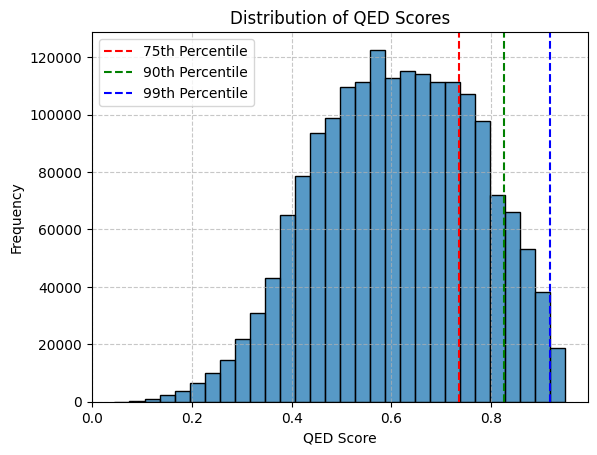

In [41]:
qed_values = likable_drugs_df["QED score"].values
q75, q90, q99 = np.percentile(qed_values, [75, 90, 99])


sns.histplot(qed_values, bins=30)
plt.axvline(q75, color='red', linestyle='--', label='75th Percentile')
plt.axvline(q90, color='green', linestyle='--', label='90th Percentile')
plt.axvline(q99, color='blue', linestyle='--', label='99th Percentile')
plt.title("Distribution of QED Scores")
plt.xlabel("QED Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

The histogram shows that most compounds have QED scores between 0.4 and 0.8, with a peak around 0.6 to 0.7, meaning that most compounds have moderate drug-likeness. Only the top 10% have QED scores above 0.8, and the top 1% are above 0.85. Compounds with scores above 0.7 are the most drug-like and could be prioritized for further study.

In [42]:
count_over_q75 = np.sum(qed_values > q75)
count_over_q90 = np.sum(qed_values > q90)
count_over_q99 = np.sum(qed_values > q99)

print(f"Number of observations over 75th percentile: {count_over_q75} out of {len(qed_values)}")
print(f"Number of observations over 90th percentile: {count_over_q90} out of {len(qed_values)}")
print(f"Number of observations over 99th percentile: {count_over_q99} out of {len(qed_values)}")

Number of observations over 75th percentile: 458148 out of 1832604
Number of observations over 90th percentile: 183254 out of 1832604
Number of observations over 99th percentile: 18167 out of 1832604


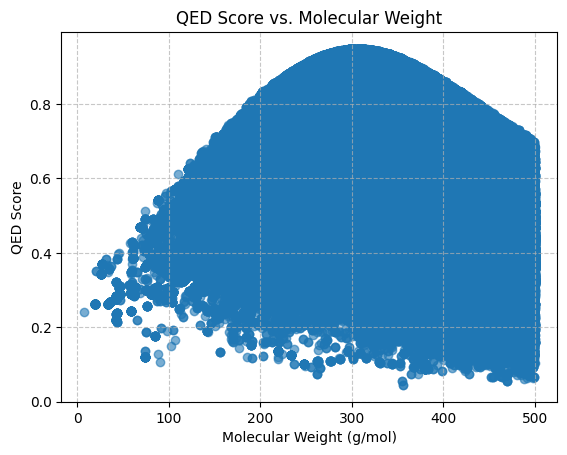

In [43]:
molecular_weights = likable_drugs_df["Molecular Weight"].values

plt.scatter(molecular_weights, qed_values, alpha=0.6)
plt.title("QED Score vs. Molecular Weight")
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("QED Score")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

This scatter plot shows that QED scores generally increase with molecular weight up to around 300 g/mol, after which they start to decline. Compounds with medium molecular weights (roughly 200-300 g/mol) tend to have the highest QED scores, indicating that this range may be optimal for drug-likeness in this dataset.